In [2]:
import pandas as pd
from create_sample import make_test, make_train
import random
from collections import Counter
import matplotlib.pyplot as plt
import dsp
import numpy as np
import os

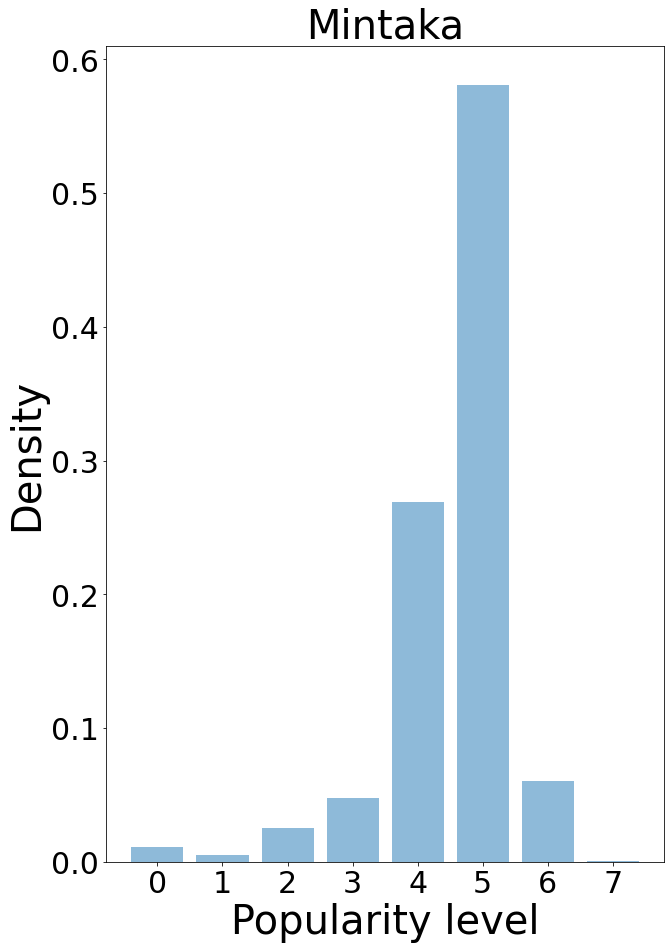

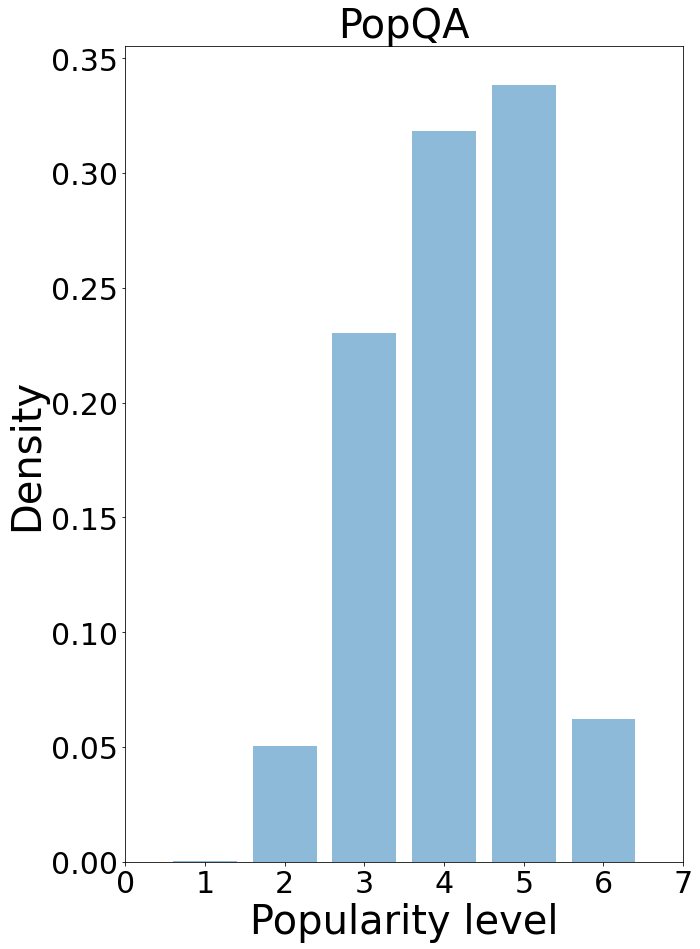

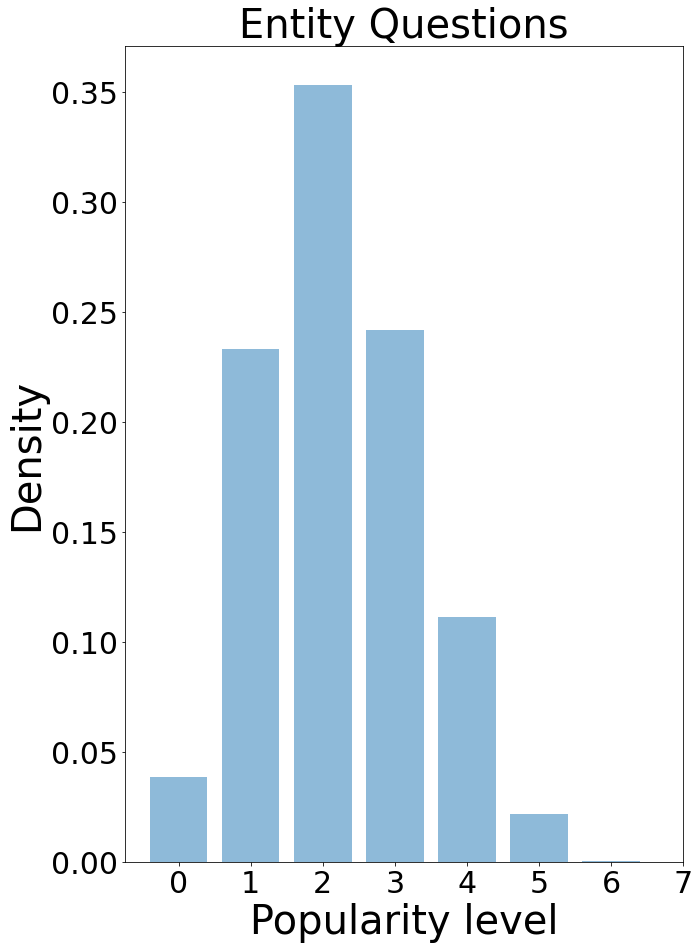

In [15]:
# import Mintaka data
mintaka_df = make_test('data/mintaka_train.json', full=True)
mintaka_df = [ex['pop'] for ex in mintaka_df]

# PopQA data
pop_qa_df = pd.read_csv("data/popQA.tsv", sep='\t')
pop_qa_df = pop_qa_df[pop_qa_df['o_pop'] > 0]
pop_qa_df = round(np.log10(pop_qa_df['o_pop']))

# Entity Ques data
path = "dataset/test"
files = os.listdir(path)

def entity_question_data(n_sample: int = None, thres: int = None):
    final = []
    
    for f in files:
        df = pd.read_json('/'.join([path, f]))
        df["pop_bin"] = np.log10(df["q_pop"].apply(lambda x: x[0]+1 if x[0] else None))
        df = df.dropna()
        df["pop_bin"] = df["pop_bin"].apply(int)
        # filter low pop data
        if thres:
            data = df[df["pop_bin"]<=thres]
        else:
            data = df
        
        if n_sample:
            true_n = n_sample if len(data) >= n_sample else len(data)
            data = data.sample(n=true_n, random_state=100)
        
        section = list(pd.concat([data['question'], data['answers'], data['pop_bin']], axis=1).apply(tuple, axis=1))
        section = [dsp.Example(question=question, answer=answer, pop=pop) for question, answer, pop in section]
        final += section
        
    return final

ent_ques_df = entity_question_data()
ent_ques_df = [ex['pop'] for ex in ent_ques_df]



datasets = {'Mintaka': mintaka_df, 'PopQA': pop_qa_df, 'Entity Questions': ent_ques_df}
label_union = []


for name, data in datasets.items():
    labels, counts = np.unique(data, return_counts=True)
    plt.figure(figsize=(10, 15))
    plt.bar(labels, counts/len(data), align='center', label=name, alpha=0.5)
    label_union += list(labels)
    plt.title(name, fontsize=40)


    plt.xticks(list(set(label_union)), fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.xlabel("Popularity level", fontsize=40)
    plt.ylabel("Density", fontsize=40)
#     plt.legend(fontsize=20)
#     plt.savefig(f'data_dist_{name}.png')

# finding pop level 0 data
# test = [ex for ex in test if ex["pop"] == 0]


# # filter out pop level = 0 & get its distributions
# pop_distr = dict(Counter([ex["type"] for ex in test if (ex["pop"] == 0)]))
# test = [ex for ex in test if (ex["pop"] == 4) or (ex["pop"] == 5)]

# # make pop 4_5 data the same distribution as pop_0
# filtered_test = []
# for key in pop_distr:
#     section = [ex for ex in test if ex["type"] == key][: 40*pop_distr[key]]
#     filtered_test += section
    
# test = filtered_test
# # len(test)
# train[:3], len(test)


In [53]:
path = "dataset/test"
files = os.listdir(path)

def entity_question_data(n_sample: int = None, thres: int = None):
    final = []
    
    for f in files:
        df = pd.read_json('/'.join([path, f]))
        df["pop_bin"] = np.log10(df["q_pop"].apply(lambda x: x[0]+1 if x[0] else None))
        df = df.dropna()
        df["pop_bin"] = df["pop_bin"].apply(int)
        # filter low pop data
        if thres:
            data = df[df["pop_bin"]<=thres]
        else:
            data = df
        
        if n_sample:
            true_n = n_sample if len(data) >= n_sample else len(data)
            data = data.sample(n=true_n, random_state=100)
        
        section = list(pd.concat([data['question'], data['answers'], data['pop_bin']], axis=1).apply(tuple, axis=1))
        section = [dsp.Example(question=question, answer=answer, pop=pop) for question, answer, pop in section]
        final += section
        
    return final

df = entity_question_data()
df = [ex['pop'] for ex in df]
# df[:5]

[2, 1, 3, 2, 2]

In [ ]:
import gym

# Import the Gym library
env = gym.make('Seaquest')  # Create an instance of the Seaquest environment

state = env.reset()  # Initialize the environment and assign the starting state

# Loop over 1000 steps of the environment
for _ in range(1000):
    # Sample a random action
    action = env.action_space.sample()
    
    # Step forward in the environment & Assign to four variables
    next_state, reward, done, info = env.step(action)  
    
    if done:
        state = env.reset()  # Re-initialize the environment and assign a new starting state
    else:
        state = next_state  # Update the state variable to the new state

env.close()  # Close the environment